# Get the data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Eg_Temp_Defect_thickness for ML.xlsx",skiprows=51)

In [ ]:
df=df.drop(columns=["i"])

In [ ]:
print(df.head())

   bp 1  bp 2  bp 3  bp 4             bp 5  eta (%)                        \
0     1   0.1   295   1.3     100000000000                      17.205721   
1     1   0.1   295   1.3    1000000000000                      17.205673   
2     1   0.1   295   1.3   10000000000000                      17.205195   
3     1   0.1   295   1.3  100000000000000                      17.200428   
4     1   0.1   295   1.4     100000000000                      19.133830   

   Voc (V)                        Jsc (mA/cm2)                   \
0                       0.653326                      34.715972   
1                       0.653326                      34.715960   
2                       0.653323                      34.715838   
3                       0.653295                      34.714620   
4                       0.752567                      32.656300   

   FF (%)                         
0                      75.860094  
1                      75.859943  
2                      75.858

# Preprocessing
- converting to log
- normaliizing values
- looking at correlation

In [ ]:
df["bp5_log"] = np.log10(df["bp 5"])

In [ ]:
print(df[["bp5_log","bp 5"]].head())

   bp5_log             bp 5
0     11.0     100000000000
1     12.0    1000000000000
2     13.0   10000000000000
3     14.0  100000000000000
4     11.0     100000000000


**Log to linear will be the main dataset**

In [ ]:
df.to_excel("log_to_linear.xlsx",index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
print(df_min_max.head())


   bp 1  bp 2  bp 3  bp 4             bp 5  eta (%)                        \
0     1   0.1   295   1.3     100000000000                      17.205721   
1     1   0.1   295   1.3    1000000000000                      17.205673   
2     1   0.1   295   1.3   10000000000000                      17.205195   
3     1   0.1   295   1.3  100000000000000                      17.200428   
4     1   0.1   295   1.4     100000000000                      19.133830   

   Voc (V)                        Jsc (mA/cm2)                   \
0                       0.653326                      34.715972   
1                       0.653326                      34.715960   
2                       0.653323                      34.715838   
3                       0.653295                      34.714620   
4                       0.752567                      32.656300   

   FF (%)                         bp5_log  
0                      75.860094     11.0  
1                      75.859943     12.0  
2 

In [ ]:
df_min_max.columns = df_min_max.columns.str.strip()  # Remove leading/trailing spaces

In [ ]:
df_min_max[["bp 1","bp 2","bp 3","bp 3","bp 4","bp5_log","eta (%)","Voc (V)","Jsc (mA/cm2)","FF (%)"]] = min_max_scaler.fit_transform(df_min_max[["bp 1","bp 2","bp 3","bp 3","bp 4","bp5_log","eta (%)","Voc (V)","Jsc (mA/cm2)","FF (%)"]])
df_min_max.to_excel("minmax_scaled_data.xlsx", index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify column names
print(df.columns)

#drop bp5
df = df.drop(columns=["bp 5"])

# Apply Z-score normalization
z_score = StandardScaler()
df_z_score = df.copy()

df_z_score[["bp 1","bp 2","bp 3","bp 3","bp 4","bp5_log","eta (%)","Voc (V)","Jsc (mA/cm2)","FF (%)"]] = \
    z_score.fit_transform(df_z_score[["bp 1","bp 2","bp 3","bp 3","bp 4","bp5_log","eta (%)","Voc (V)","Jsc (mA/cm2)","FF (%)"]])

print(df_z_score.head())  # Verify the transformed data


Index(['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp 5', 'eta (%)', 'Voc (V)',
       'Jsc (mA/cm2)', 'FF (%)', 'bp5_log'],
      dtype='object')
      bp 1      bp 2      bp 3      bp 4   eta (%)   Voc (V)  Jsc (mA/cm2)  \
0 -1.46385 -1.414214 -1.527525 -1.341641 -1.472974 -0.953104     -0.170643   
1 -1.46385 -1.414214 -1.527525 -1.341641 -1.472988 -0.953106     -0.170649   
2 -1.46385 -1.414214 -1.527525 -1.341641 -1.473124 -0.953131     -0.170706   
3 -1.46385 -1.414214 -1.527525 -1.341641 -1.474483 -0.953378     -0.171278   
4 -1.46385 -1.414214 -1.527525 -0.447214 -0.923404 -0.091967     -1.138242   

     FF (%)   bp5_log  
0 -3.342241 -1.341641  
1 -3.342305 -0.447214  
2 -3.342947  0.447214  
3 -3.349353  1.341641  
4 -2.493205 -1.341641  


In [ ]:
df_z_score.to_excel("zscore_scaled_data.xlsx", index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Min Max Scored Data**

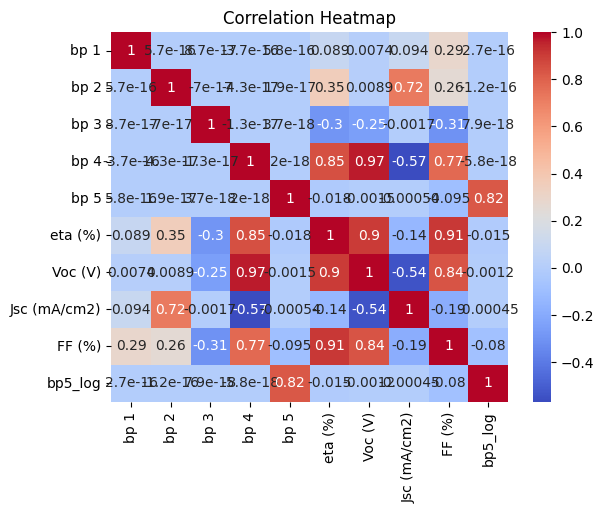

In [ ]:
correlation_matrix = df_min_max.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

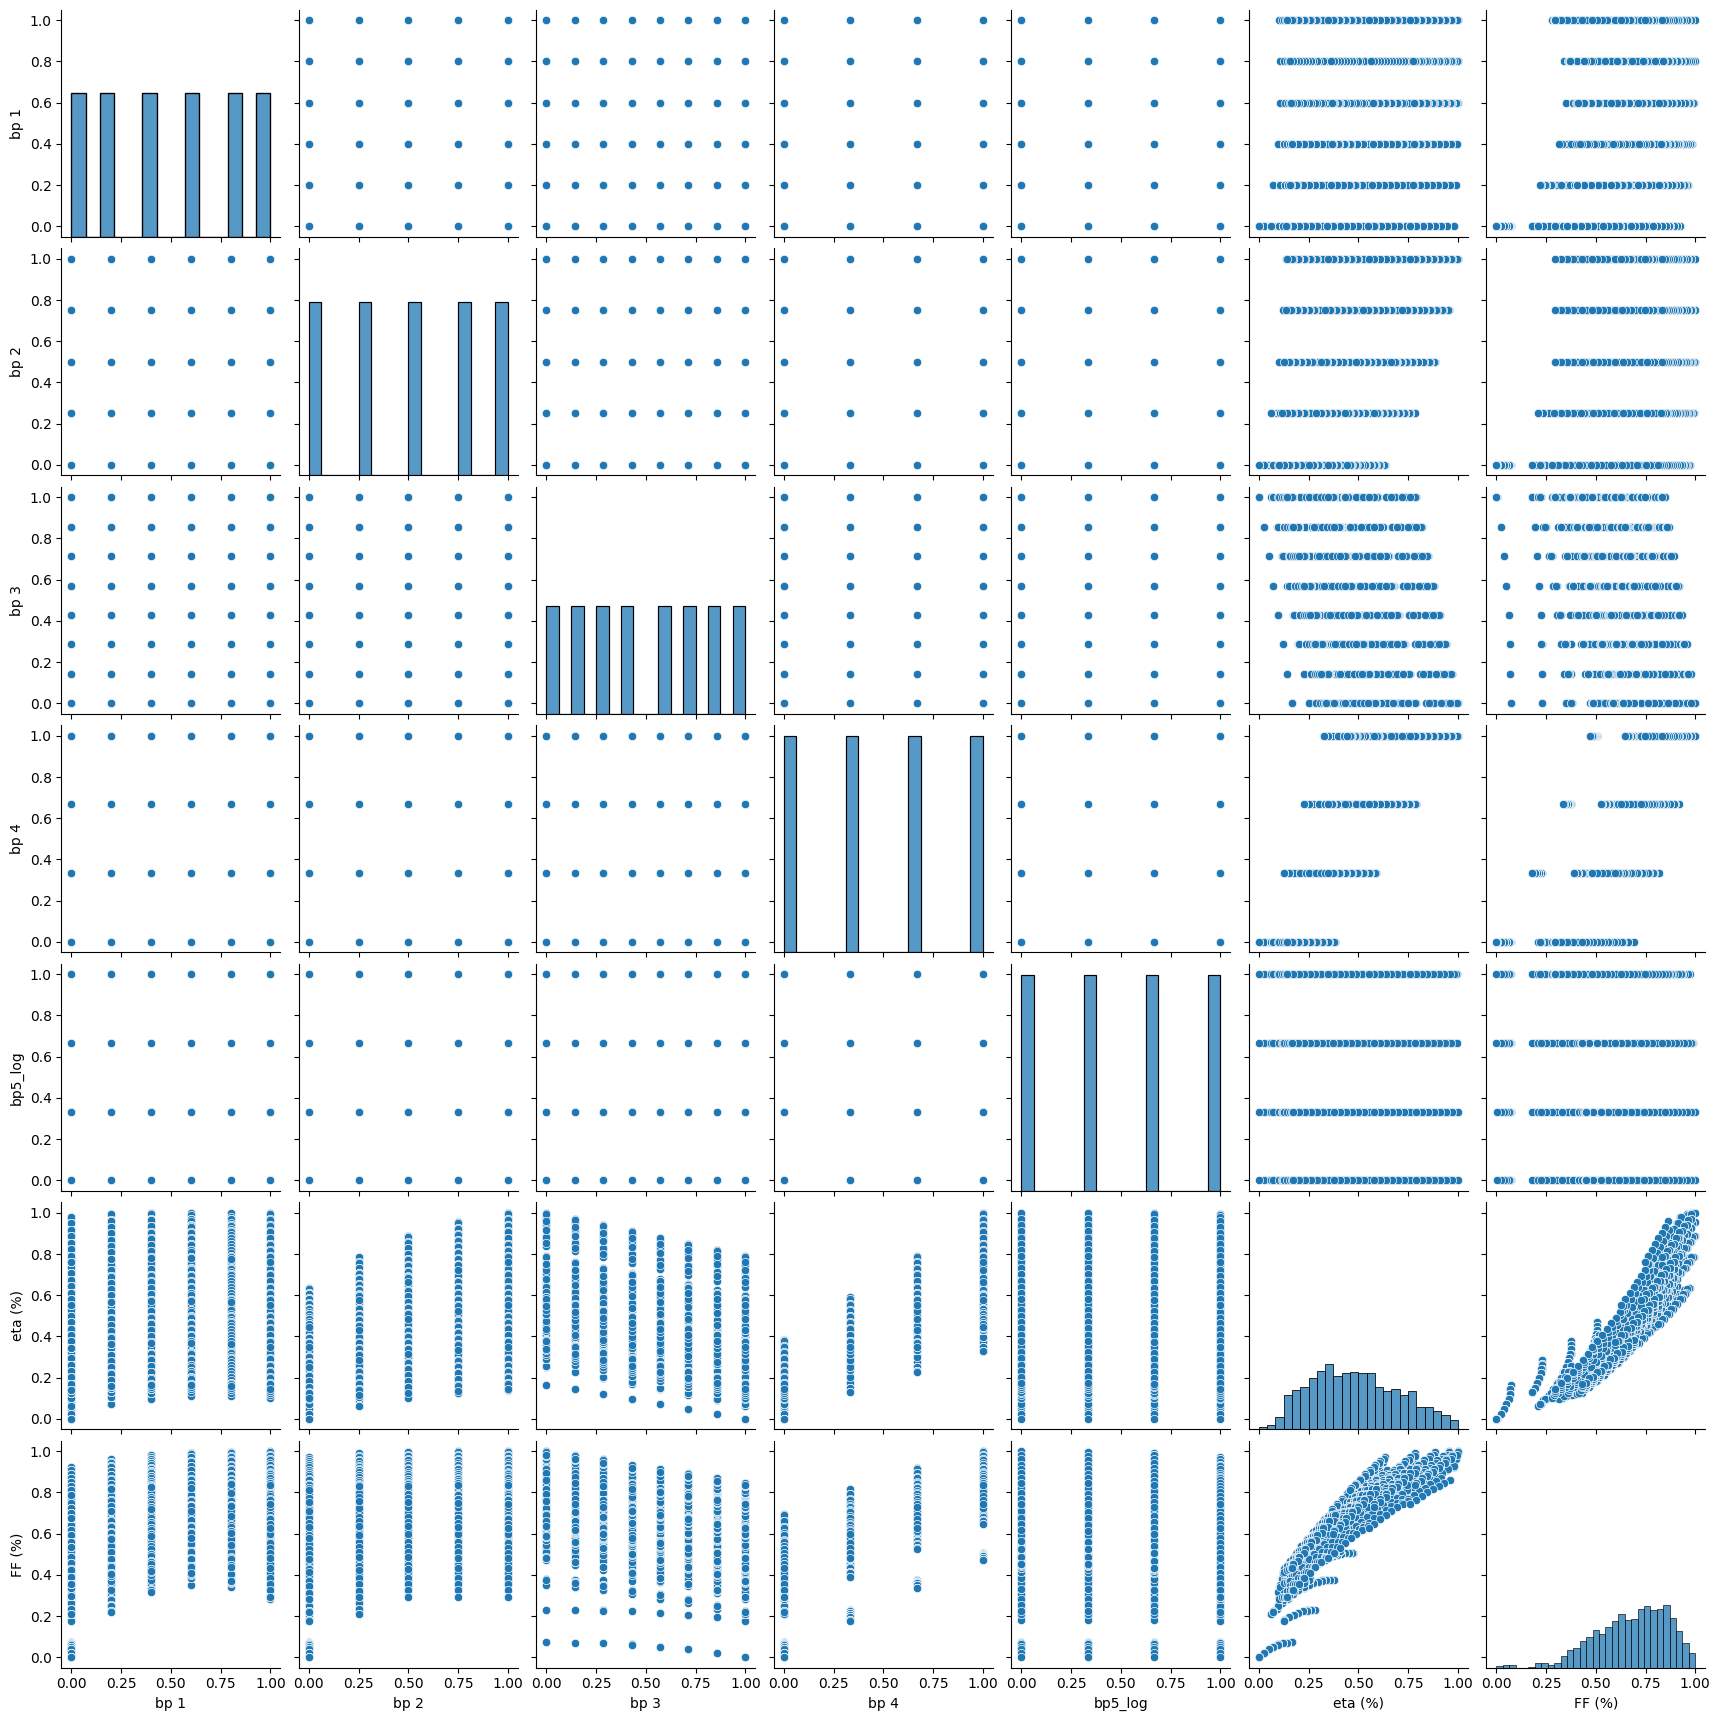

In [ ]:
sns.pairplot(df_min_max, vars=["bp 1", "bp 2", "bp 3", "bp 4","bp5_log", "eta (%)", "FF (%)"])
plt.show()


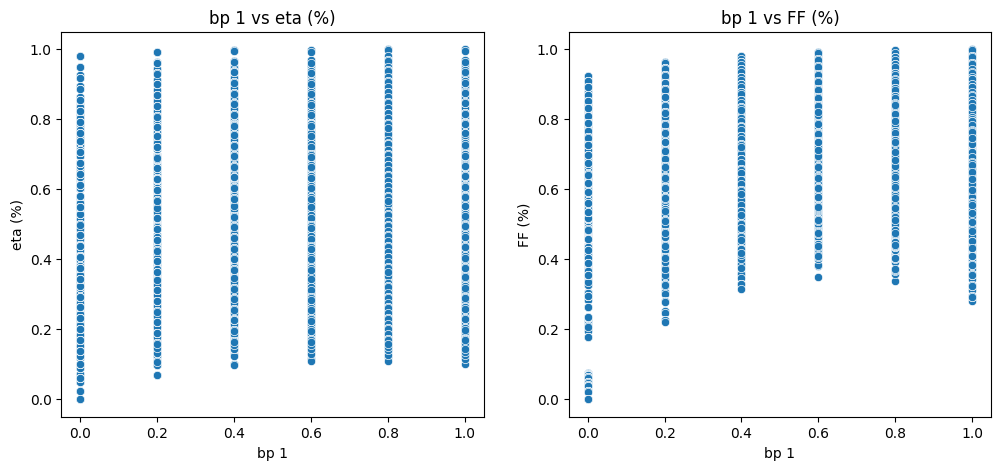

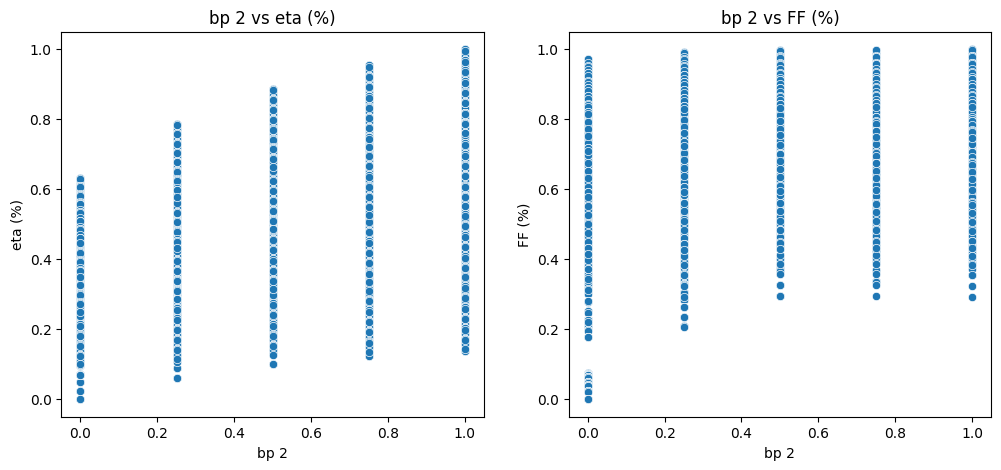

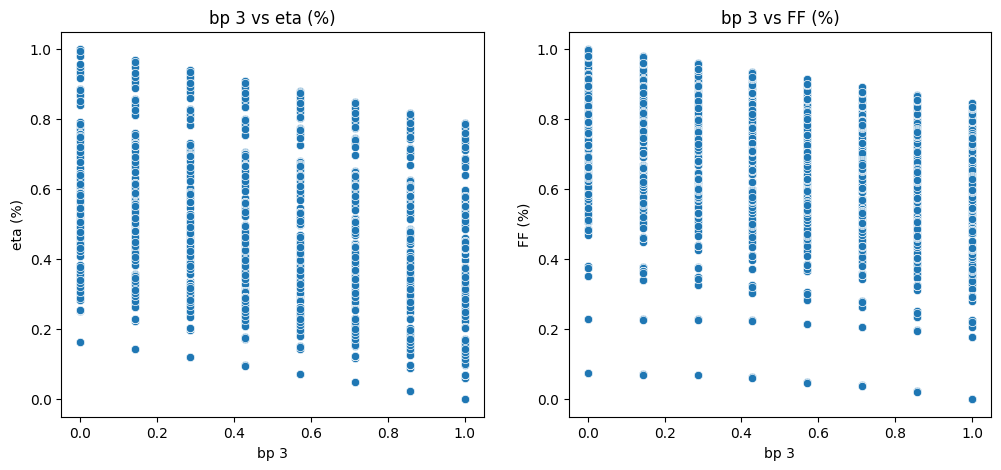

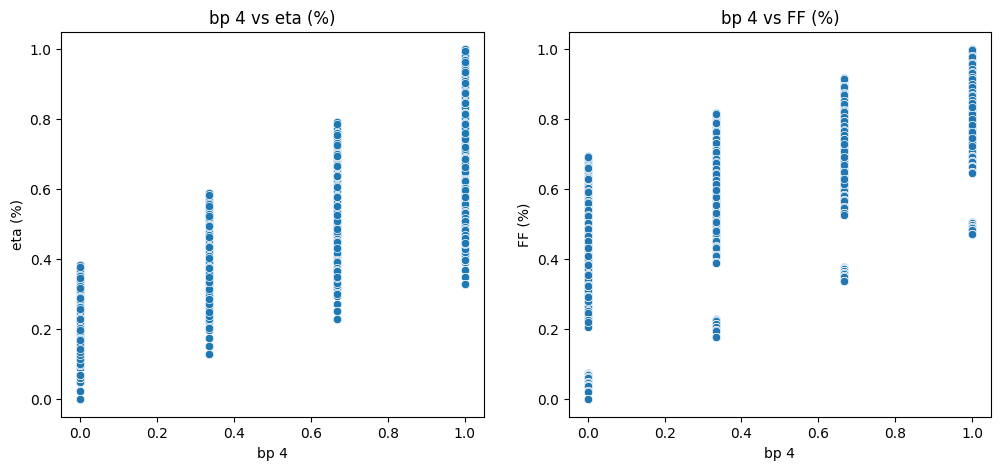

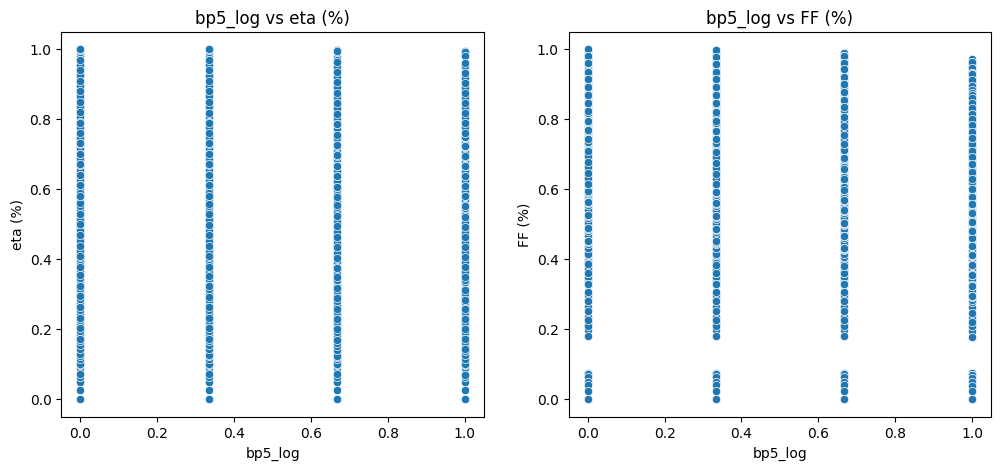

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for eta (%)
sns.scatterplot(x=df_min_max["bp 1"], y=df_min_max["eta (%)"], ax=axes[0])
axes[0].set_title("bp 1 vs eta (%)")
axes[0].set_xlabel("bp 1")
axes[0].set_ylabel("eta (%)")

# Scatter plot for FF (%)
sns.scatterplot(x=df_min_max["bp 1"], y=df_min_max["FF (%)"], ax=axes[1])
axes[1].set_title("bp 1 vs FF (%)")
axes[1].set_xlabel("bp 1")
axes[1].set_ylabel("FF (%)")

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for eta (%)
sns.scatterplot(x=df_min_max["bp 2"], y=df_min_max["eta (%)"], ax=axes[0])
axes[0].set_title("bp 2 vs eta (%)")
axes[0].set_xlabel("bp 2")
axes[0].set_ylabel("eta (%)")

# Scatter plot for FF (%)
sns.scatterplot(x=df_min_max["bp 2"], y=df_min_max["FF (%)"], ax=axes[1])
axes[1].set_title("bp 2 vs FF (%)")
axes[1].set_xlabel("bp 2")
axes[1].set_ylabel("FF (%)")

plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for eta (%)
sns.scatterplot(x=df_min_max["bp 3"], y=df_min_max["eta (%)"], ax=axes[0])
axes[0].set_title("bp 3 vs eta (%)")
axes[0].set_xlabel("bp 3")
axes[0].set_ylabel("eta (%)")

# Scatter plot for FF (%)
sns.scatterplot(x=df_min_max["bp 3"], y=df_min_max["FF (%)"], ax=axes[1])
axes[1].set_title("bp 3 vs FF (%)")
axes[1].set_xlabel("bp 3")
axes[1].set_ylabel("FF (%)")

plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for eta (%)
sns.scatterplot(x=df_min_max["bp 4"], y=df_min_max["eta (%)"], ax=axes[0])
axes[0].set_title("bp 4 vs eta (%)")
axes[0].set_xlabel("bp 4")
axes[0].set_ylabel("eta (%)")

# Scatter plot for FF (%)
sns.scatterplot(x=df_min_max["bp 4"], y=df_min_max["FF (%)"], ax=axes[1])
axes[1].set_title("bp 4 vs FF (%)")
axes[1].set_xlabel("bp 4")
axes[1].set_ylabel("FF (%)")

plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for eta (%)
sns.scatterplot(x=df_min_max["bp5_log"], y=df_min_max["eta (%)"], ax=axes[0])
axes[0].set_title("bp5_log vs eta (%)")
axes[0].set_xlabel("bp5_log")
axes[0].set_ylabel("eta (%)")

# Scatter plot for FF (%)
sns.scatterplot(x=df_min_max["bp5_log"], y=df_min_max["FF (%)"], ax=axes[1])
axes[1].set_title("bp5_log vs FF (%)")
axes[1].set_xlabel("bp5_log")
axes[1].set_ylabel("FF (%)")

plt.show()


**Z** **scored** **Data**

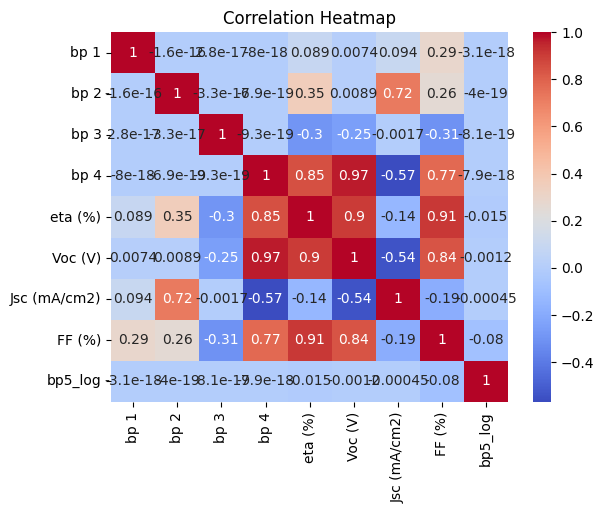

In [ ]:
correlation_matrix1 = df_z_score.corr()
sns.heatmap(correlation_matrix1, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

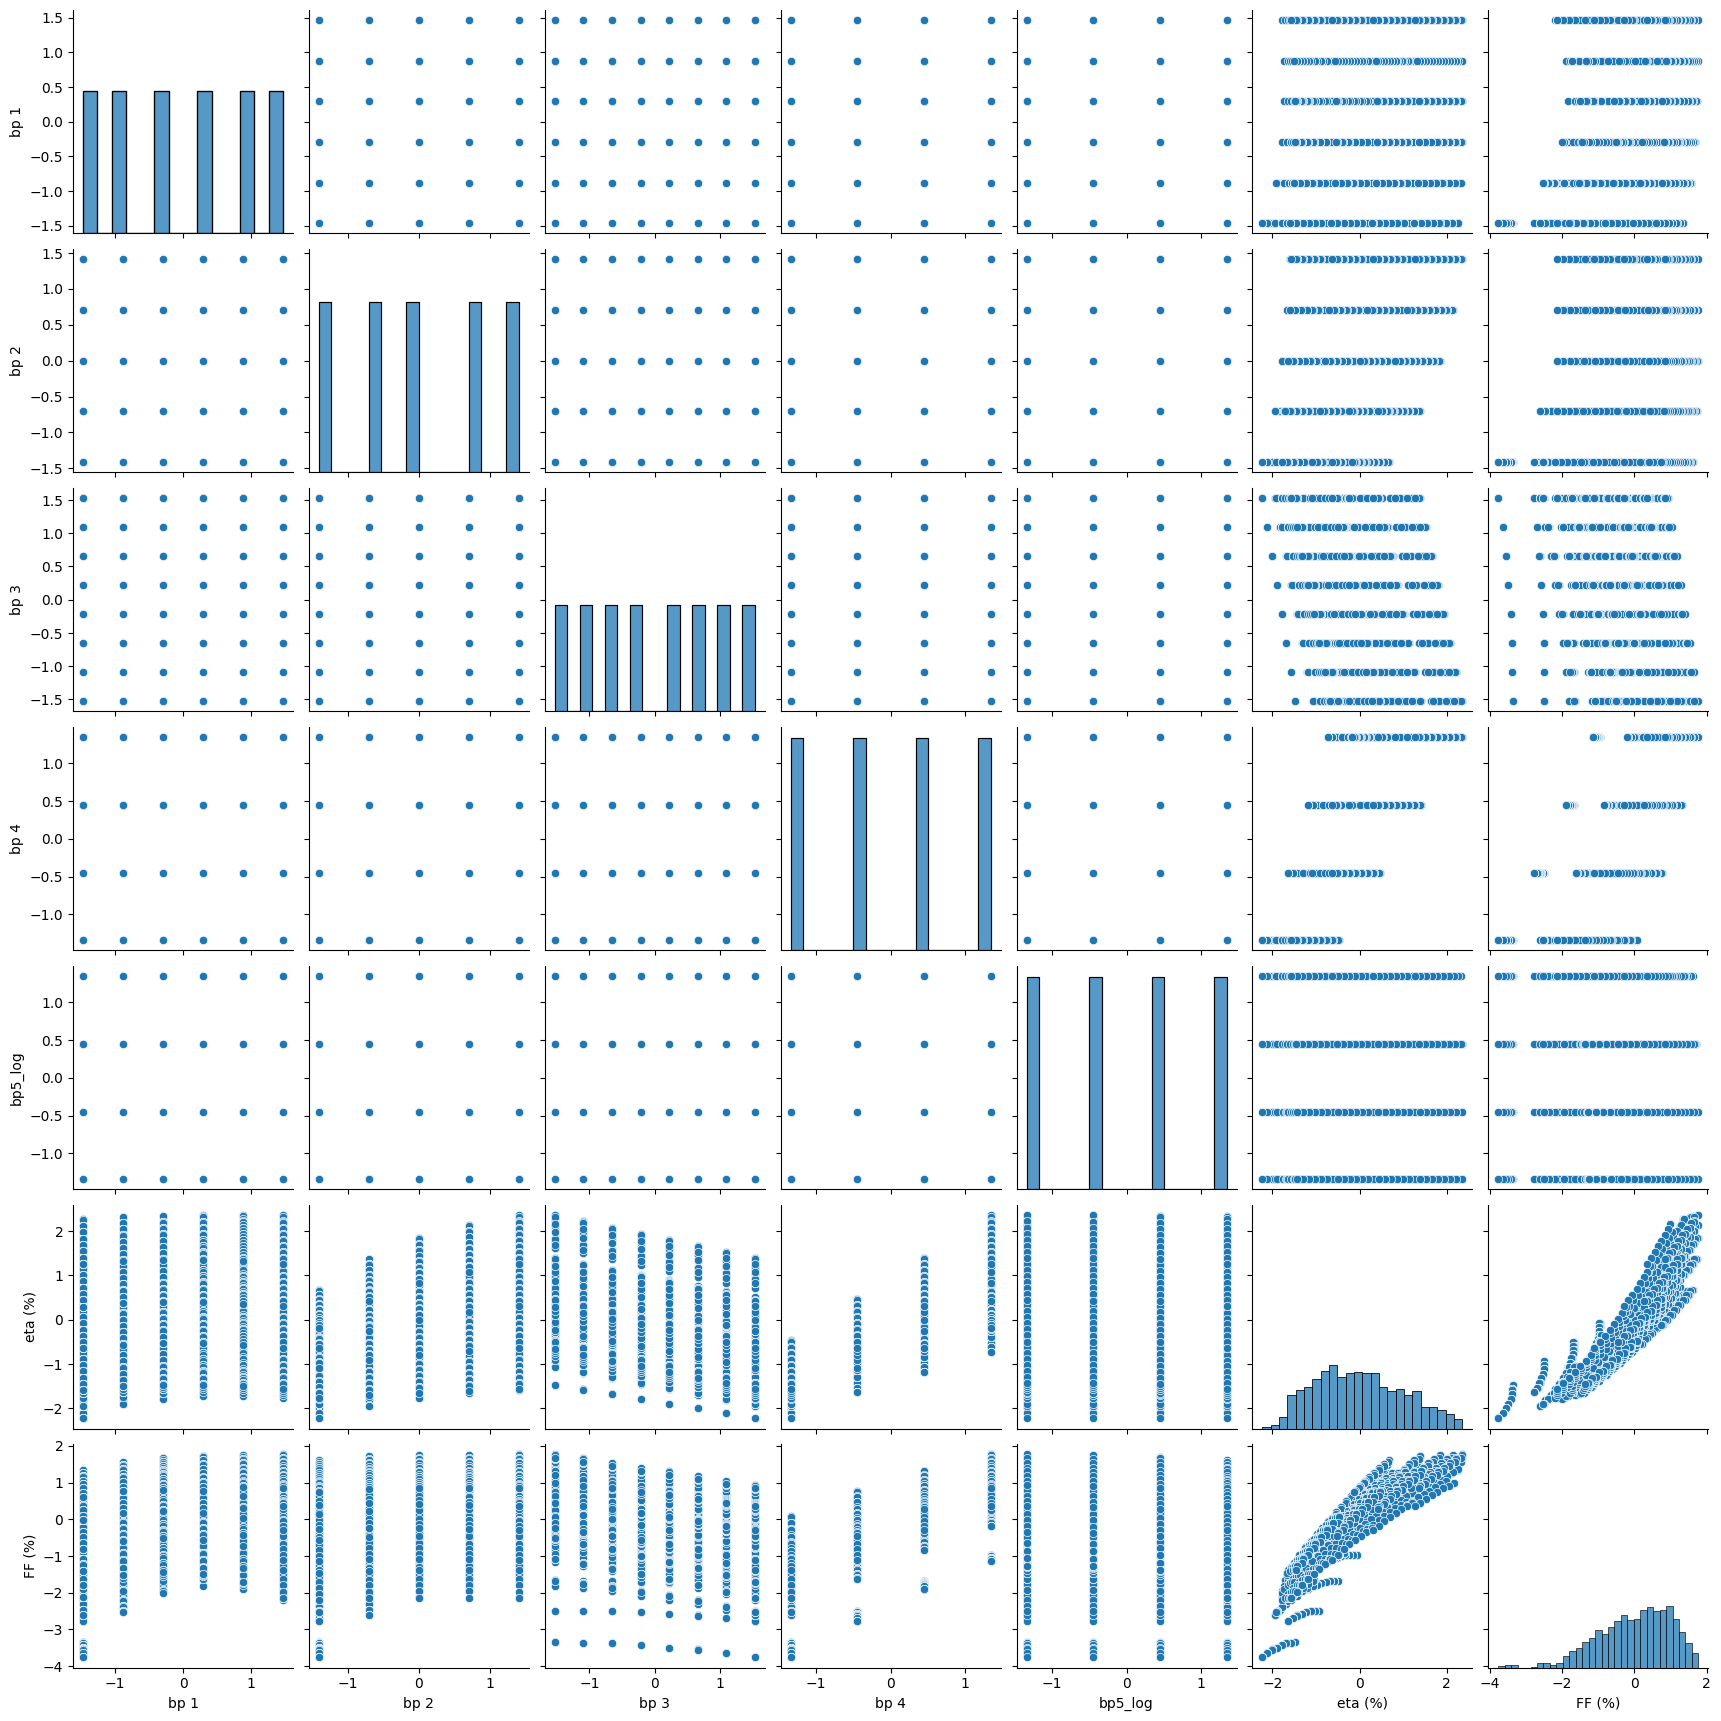

In [ ]:
sns.pairplot(df_z_score, vars=["bp 1", "bp 2", "bp 3","bp 4","bp5_log", "eta (%)", "FF (%)"])
plt.show()


# Kernal PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Load DataFrame (assuming you already have 'df')
df = pd.read_excel("/content/log_to_linear.xlsx")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


# Select only numeric features (excluding target variables if needed)
X = df.drop(columns=["bp 5", "eta (%)", "Voc (V)", "Jsc (mA/cm2)", "FF (%)"])
print(X.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)

# Convert to DataFrame
kpca_df = pd.DataFrame(X_kpca, columns=['PC1', 'PC2'])

# Display results
print(kpca_df.head())


   bp 1  bp 2  bp 3  bp 4  bp5_log
0     1   0.1   295   1.3       11
1     1   0.1   295   1.3       12
2     1   0.1   295   1.3       13
3     1   0.1   295   1.3       14
4     1   0.1   295   1.4       11
        PC1       PC2
0 -0.155760 -0.195590
1 -0.210596 -0.100433
2 -0.227734  0.050743
3 -0.195590  0.155760
4 -0.050743 -0.227734


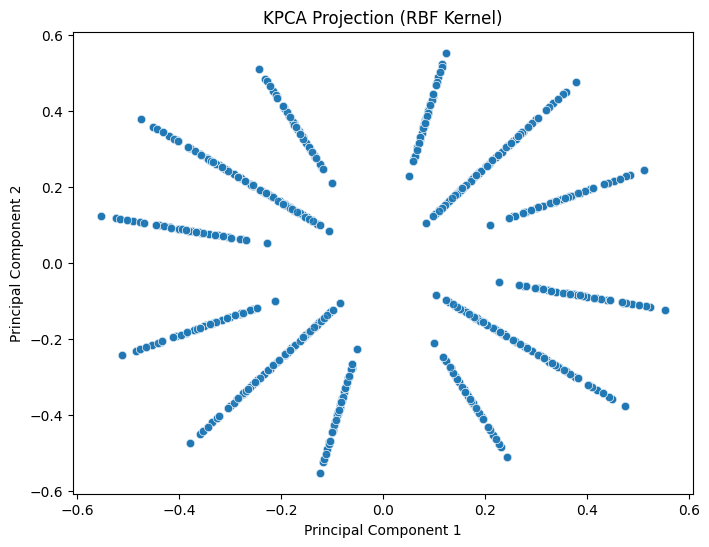

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of KPCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=kpca_df["PC1"], y=kpca_df["PC2"], alpha=0.7)

# Labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KPCA Projection (RBF Kernel)")

# Show plot
plt.show()



# Trying out various algorithms for recognising optimal params

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load dataset
df = pd.read_excel("zscore_scaled_data.xlsx")

# Features (Independent Variables)
X = df[["bp 1", "bp 2", "bp 3","bp 4","bp5_log"]]

# Target Variables (Dependent Variables)
y = df[["FF (%)", "eta (%)"]]  # Multi-output regression

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression on Z scored data**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 0.22993057684780968
RMSE: 0.32844400738327895
R² Score: 0.8940880227727405


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
mae_scores = cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')

# Print averaged results
print("Cross-Validation Results for Linear Regression:")
print(f"Mean Absolute Error (MAE): {-mae_scores.mean():.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scores.mean():.4f}")
print(f"R² Score: {r2_scores.mean():.4f}")


Cross-Validation Results for Linear Regression:
Mean Absolute Error (MAE): 0.2245
Root Mean Squared Error (RMSE): 0.3194
R² Score: 0.8977


## **Random forest regression**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))



Random Forest Performance:
MAE: 0.03687972947835975
RMSE: 0.05579710618733596
R² Score: 0.9969424561843925


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Define 5-Fold Cross-Validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
mae_scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')

# Print averaged results
print("\nCross-Validation Results for Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {-mae_scores.mean():.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scores.mean():.4f}")
print(f"R² Score: {r2_scores.mean():.4f}")



Cross-Validation Results for Random Forest Regressor:
Mean Absolute Error (MAE): 0.0380
Root Mean Squared Error (RMSE): 0.0570
R² Score: 0.9967


## **XGBoost**

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("\nXGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))



XGBoost Performance:
MAE: 0.02350970171391964
RMSE: 0.03348570028491323
R² Score: 0.9988989233970642


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Define 5-Fold Cross-Validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
mae_scores = cross_val_score(xgb, X, y, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(xgb, X, y, cv=cv, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(xgb, X, y, cv=cv, scoring='r2')

# Print averaged results
print("\nCross-Validation Results for XGBoost Regressor:")
print(f"Mean Absolute Error (MAE): {-mae_scores.mean():.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scores.mean():.4f}")
print(f"R² Score: {r2_scores.mean():.4f}")



Cross-Validation Results for XGBoost Regressor:
Mean Absolute Error (MAE): 0.0240
Root Mean Squared Error (RMSE): 0.0341
R² Score: 0.9988


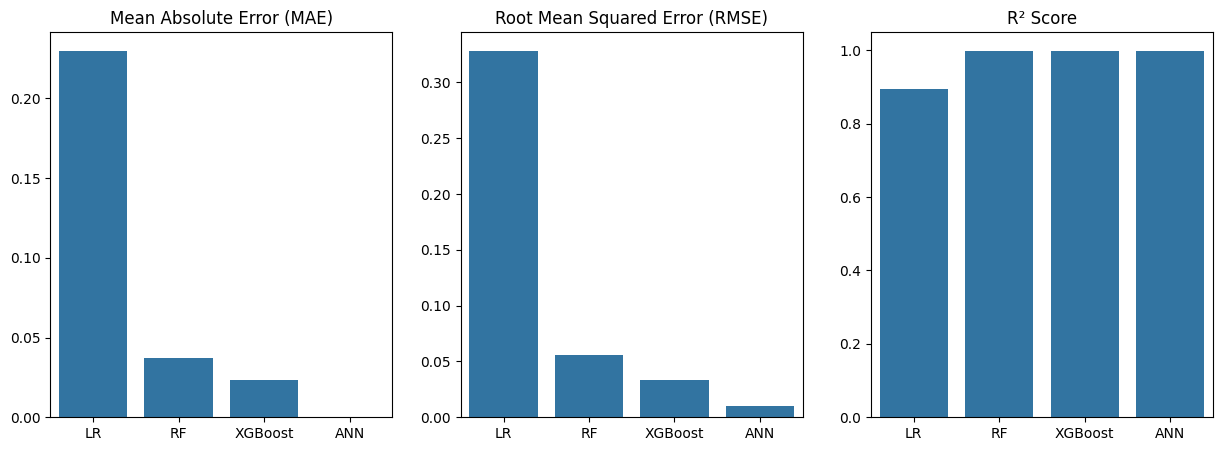

In [ ]:
models = ["LR", "RF", "XGBoost","ANN"]
mae_values = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb),
    0.00010
]

rmse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    0.00984
]

r2_values = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb),
    0.9976
]

# Plot Performance
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=models, y=mae_values, ax=ax[0])
ax[0].set_title("Mean Absolute Error (MAE)")

sns.barplot(x=models, y=rmse_values, ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)")

sns.barplot(x=models, y=r2_values, ax=ax[2])
ax[2].set_title("R² Score")

plt.show()


In [ ]:
!pip install bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization

### Linear Regression obtained params

In [ ]:
import pandas as pd
import numpy as np

# Load data and clean column names
df = pd.read_excel("log_to_linear.xlsx")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print("Detected Columns:", df.columns.tolist())  # Debugging step

# Use exact column names from the dataset
means = df[['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp5_log','FF (%)', 'eta (%)']].mean()
stds = df[['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp5_log','FF (%)', 'eta (%)']].std()

Detected Columns: ['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp 5', 'eta (%)', 'Voc (V)', 'Jsc (mA/cm2)', 'FF (%)', 'bp5_log']


In [ ]:
# Load dataset
df = pd.read_excel("zscore_scaled_data.xlsx")

# Define input and output variables
X = df[["bp 1", "bp 2", "bp 3","bp 4","bp5_log"]] # Already normalized
y = df[['FF (%)', 'eta (%)']]


# Define parameter search space
pbounds = {
    'bp1': (X['bp 1'].min(), X['bp 1'].max()),
    'bp2': (X['bp 2'].min(), X['bp 2'].max()),
    'bp3': (X['bp 3'].min(), X['bp 3'].max()),
    'bp4': (X['bp 4'].min(), X['bp 4'].max()),
    'bp5_log': (X['bp5_log'].min(), X['bp5_log'].max())
}

print(pbounds)



{'bp1': (-1.4638501094228, 1.4638501094228), 'bp2': (-1.414213562373095, 1.414213562373095), 'bp3': (-1.527525231651947, 1.527525231651947), 'bp4': (-1.341640786499873, 1.341640786499875), 'bp5_log': (-1.341640786499874, 1.341640786499874)}


In [ ]:
# Define objective function to maximize FF + η
def objective(bp1, bp2, bp3, bp4, bp5_log):
    inputs = np.array([[bp1, bp2, bp3, bp4, bp5_log]])
    predictions_lr = lr.predict(inputs)
    ff, eta = predictions_lr[0]
    return ff + eta  # Maximizing FF + Efficiency

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=30)  # Initial 5 random points, then optimize over 30 iterations

# Get best parameters
best_params_lr = optimizer.max['params']
print("\nOptimal Input Parameters:", best_params_lr)

# Predict Voc and Jsc for the best parameters
best_input_scaled_lr = np.array([list(best_params_lr.values())])
best_predictions_lr = lr.predict(best_input_scaled_lr)
best_ff_lr, best_eta_lr = best_predictions_lr[0]

# Print the best results
print("\nMaximized Output Values:")
print(f"Fill Factor (FF): {best_ff_lr:.4f}")
print(f"Efficiency (η): {best_eta_lr:.4f}")

|   iter    |  target   |    bp1    |    bp2    |    bp3    |    bp4    |  bp5_log  |
-------------------------------------------------------------------------------------
| 1         | 0.7335    | -0.3673   | 1.275     | 0.7088    | 0.2647    | -0.923    |
| 2         | -1.424    | -1.007    | -1.25     | 1.119     | 0.2713    | 0.5583    |
| 3         | -1.511    | -1.404    | 1.329     | 1.016     | -0.7719   | -0.8538   |
| 4         | -0.9675   | -0.9269   | -0.5537   | 0.07563   | -0.1826   | -0.5602   |
| 5         | -0.6832   | 0.3275    | -1.02     | -0.635    | -0.3586   | -0.1179   |
| 6         | -0.8148   | 0.4386    | -1.234    | -0.5351   | -0.3442   | -0.0513   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

| 7         | 1.55      | 0.006838  | 1.318     | 0.6139    | 0.6247    | -0.9632   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 8         | 3.62      | 1.014     | 1.414     | -0.1038   | 1.334     | -1.342    |
| 9         | 4.004     | 1.204     | 1.334     | -1.346    | 1.124     | -0.9027   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 10        | 3.912     | 1.187     | 1.167     | -1.264    | 1.296     | 1.179     |
| 11        | 4.075     | 1.464     | 0.4403    | -1.528    | 1.342     | -1.342    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 12        | 3.155     | -1.341    | 1.15      | -1.527    | 1.325     | 1.224     |
| 13        | 3.479     | -1.06     | 1.379     | -1.466    | 1.256     | -0.9655   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 14        | 3.975     | 0.9553    | 1.299     | -1.145    | 1.315     | 0.1198    |
| 15        | 4.093     | 1.463     | 0.9181    | -1.52     | 1.293     | 0.4386    |
| 16        | 3.9       | 0.5221    | 1.175     | -1.485    | 1.294     | 0.2017    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 17        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 18        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 19        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 20        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 21        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 22        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 23        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 24        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 25        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 26        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 27        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 28        | 4.663     | 1.464     | 1.414     | -1.5

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


| 29        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 30        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 31        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 32        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 33        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 34        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |
| 35        | 4.663     | 1.464     | 1.414     | -1.528    | 1.342     | -1.342    |

Optimal Input Parameters: {'bp1': np.float64(1.4638501094228), 'bp2': np.float64(1.414213562373095), 'bp3': np.float64(-1.527525231651947), 'bp4': np.float64(1.341640786499875), 'bp5_log': np.float64(-1.341640786499874)}

Maximized Output Values:
Fill Factor (FF): 2.4094
Efficiency (η): 2.2534


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Linear regression Parameters:")

print(best_params_lr)

# Convert back to original scale using correct column names
best_bp1_lr = (best_params_lr['bp1'] * stds['bp 1']) + means['bp 1']
best_bp2_lr = (best_params_lr['bp2'] * stds['bp 2']) + means['bp 2']
best_bp3_lr = (best_params_lr['bp3'] * stds['bp 3']) + means['bp 3']
best_bp4_lr = (best_params_lr['bp4'] * stds['bp 4']) + means['bp 4']
best_bp5_lr = 10 ** ((best_params_lr['bp5_log'] * stds['bp5_log']) + means['bp5_log'])  # Convert log scale back
ff_lr = (best_ff_lr * stds['FF (%)']) + means['FF (%)']
eta_lr = (best_eta_lr * stds['eta (%)']) + means['eta (%)']

# Print the denormalized values
print("\nDenormalized Optimal Input Parameters:")
print(f"bp 1: {best_bp1_lr:.4f}")
print(f"bp 2: {best_bp2_lr:.4f}")
print(f"bp 3: {best_bp3_lr:.4f}")
print(f"bp 4: {best_bp4_lr:.4f}")
print(f"bp 5: {(best_bp5_lr):.4f}")

print("\nDenormalised Optimal output Parameters:")
print(f"FF (%): {ff_lr:.4f}")
print(f"η (%): {eta_lr:.4f}")


Linear regression Parameters:
{'bp1': np.float64(1.4638501094228), 'bp2': np.float64(1.414213562373095), 'bp3': np.float64(-1.527525231651947), 'bp4': np.float64(1.341640786499875), 'bp5_log': np.float64(-1.341640786499874)}

Denormalized Optimal Input Parameters:
bp 1: 6.0003
bp 2: 0.5000
bp 3: 294.9977
bp 4: 1.6000
bp 5: 99955028964.3335

Denormalised Optimal output Parameters:
FF (%): 89.3787
η (%): 30.2804


### Random Forest obtained parameters

In [ ]:
# Define objective function to maximize FF + η
def objective(bp1, bp2, bp3, bp4, bp5_log):
    inputs = np.array([[bp1, bp2, bp3, bp4, bp5_log]])
    predictions_rf = rf.predict(inputs)
    ff, eta = predictions_rf[0]
    return ff + eta  # Maximizing FF + Efficiency

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=30)  # Initial 5 random points, then optimize over 30 iterations

# Get best parameters
best_params_rf = optimizer.max['params']
print("\nOptimal Input Parameters:", best_params_rf)

# Predict Voc and Jsc for the best parameters
best_input_scaled_rf = np.array([list(best_params_rf.values())])
best_predictions_rf = rf.predict(best_input_scaled_rf)
best_ff_rf, best_eta_rf = best_predictions_rf[0]

# Print the best results
print("\nMaximized Output Values:")
print(f"Fill Factor (FF): {best_ff_rf:.4f}")
print(f"Efficiency (η): {best_eta_rf:.4f}")

|   iter    |  target   |    bp1    |    bp2    |    bp3    |    bp4    |  bp5_log  |
-------------------------------------------------------------------------------------
| 1         | 1.249     | -0.3673   | 1.275     | 0.7088    | 0.2647    | -0.923    |
| 2         | -1.504    | -1.007    | -1.25     | 1.119     | 0.2713    | 0.5583    |
| 3         | -1.189    | -1.404    | 1.329     | 1.016     | -0.7719   | -0.8538   |
| 4         | -1.112    | -0.9269   | -0.5537   | 0.07563   | -0.1826   | -0.5602   |
| 5         | 0.08719   | 0.3275    | -1.02     | -0.635    | -0.3586   | -0.1179   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

| 6         | -0.3316   | 0.4386    | -1.234    | -0.5351   | -0.3442   | -0.0513   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 7         | 0.9595    | -0.3449   | 1.319     | 0.8943    | 0.6909    | -0.7939   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 8         | 1.544     | 0.2738    | 1.414     | 0.4001    | 0.4189    | -1.123    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 9         | 2.075     | 0.4239    | 1.26      | -0.4966   | 0.08196   | -0.3389   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 10        | 1.102     | 0.7327    | 1.062     | -1.479    | -0.3757   | -1.134    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 11        | -0.04305  | 1.464     | 1.414     | 0.06116   | -0.6322   | 0.1133    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 12        | 2.346     | -0.2262   | 1.273     | -1.127    | 0.8128    | -0.7483   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 13        | 4.023     | 0.2024    | 1.293     | -1.454    | 1.332     | 0.3514    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 14        | 2.141     | -0.4022   | 0.9082    | -1.457    | 0.7546    | 1.276     |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 15        | 3.767     | 1.463     | 0.9181    | -1.52     | 1.293     | 0.4386    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 16        | 3.785     | 0.6834    | 0.3816    | -1.476    | 1.271     | 0.3181    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 17        | 3.192     | 1.401     | 1.304     | -0.9253   | 1.271     | 1.228     |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 18        | 3.785     | 1.407     | 0.5815    | -1.394    | 1.326     | -1.071    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 19        | 2.749     | 1.212     | -0.9504   | -0.935    | 1.309     | -1.304    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 20        | 3.32      | 1.277     | 0.8073    | -0.6467   | 1.264     | -0.02549  |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 21        | 2.984     | 1.459     | -0.3805   | -1.373    | 1.266     | -0.6329   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 22        | 4.031     | 0.5415    | 1.173     | -1.514    | 1.243     | -0.3431   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 23        | 4.024     | 0.6511    | 1.344     | -1.498    | 1.221     | 0.3621    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 24        | 3.417     | -0.3656   | -0.1969   | -1.469    | 1.278     | -1.057    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 25        | 3.79      | 0.2245    | 0.3632    | -1.497    | 1.329     | -0.5878   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 26        | 4.014     | 1.344     | 1.344     | -1.409    | 1.338     | -0.3757   |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 27        | 1.538     | -1.276    | -0.5061   | -1.522    | 1.275     | 0.5129    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 28        | 0.6772    | 1.464     | -1.414    | 1.528     | 1.342     | -1.342    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 29        | 3.756     | 0.3331    | 1.146     | -0.9305   | 1.294     | 0.4044    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 30        | 1.432     | -0.3924   | -1.401    | -1.51     | 1.302     | -1.081    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 31        | 3.799     | 0.7738    | 0.8122    | -1.343    | 1.32      | -1.159    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 32        | 3.764     | 0.9535    | 1.207     | -1.14     | 1.333     | -0.155    |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 33        | 2.481     | 1.371     | -0.7002   | -1.458    | 1.234     | 1.147     |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


| 34        | 2.614     | 0.3465    | 1.387     | 0.7079    | 1.311     | 1.326     |
| 35        | 3.483     | 0.5544    | -0.07546  | -1.483    | 1.168     | -1.329    |

Optimal Input Parameters: {'bp1': np.float64(0.5415409366232007), 'bp2': np.float64(1.172694010372219), 'bp3': np.float64(-1.513666523984722), 'bp4': np.float64(1.242810178446342), 'bp5_log': np.float64(-0.34308550717106756)}

Maximized Output Values:
Fill Factor (FF): 1.6865
Efficiency (η): 2.3446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(best_params_rf)

# Convert back to original scale using correct column names
best_bp1_rf = (best_params_rf['bp1'] * stds['bp 1']) + means['bp 1']
best_bp2_rf = (best_params_rf['bp2'] * stds['bp 2']) + means['bp 2']
best_bp3_rf = (best_params_rf['bp3'] * stds['bp 3']) + means['bp 3']
best_bp4_rf = (best_params_rf['bp4'] * stds['bp 4']) + means['bp 4']
best_bp5_rf = 10 ** ((best_params_rf['bp5_log'] * stds['bp5_log']) + means['bp5_log'])  # Convert log scale back
ff_rf = (best_ff_rf * stds['FF (%)']) + means['FF (%)']
eta_rf = (best_eta_rf * stds['eta (%)']) + means['eta (%)']


# Print the denormalized values
print("\nDenormalized Optimal Input Parameters:")
print(f"bp 1: {best_bp1_rf:.4f}")
print(f"bp 2: {best_bp2_rf:.4f}")
print(f"bp 3: {best_bp3_rf:.4f}")
print(f"bp 4: {best_bp4_rf:.4f}")
print(f"bp 5: {(best_bp5_rf):.4f}")

print("\nDenormalised Optimal output Parameters:")
print(f"FF (%): {ff_rf:.4f}")
print(f"η (%): {eta_rf:.4f}")


{'bp1': np.float64(0.5415409366232007), 'bp2': np.float64(1.172694010372219), 'bp3': np.float64(-1.513666523984722), 'bp4': np.float64(1.242810178446342), 'bp5_log': np.float64(-0.34308550717106756)}

Denormalized Optimal Input Parameters:
bp 1: 4.4250
bp 2: 0.4659
bp 3: 295.1565
bp 4: 1.5890
bp 5: 1307280510869.5457

Denormalised Optimal output Parameters:
FF (%): 87.6793
η (%): 30.6004


### XGBoost obtained parameters

In [ ]:
# Define objective function to maximize FF + η
def objective(bp1, bp2, bp3, bp4, bp5_log):
    inputs = np.array([[bp1, bp2, bp3, bp4, bp5_log]])
    predictions_xgb = xgb.predict(inputs)
    ff, eta = predictions_xgb[0]
    return ff + eta  # Maximizing FF + Efficiency

# Define parameter search space
pbounds = {
    'bp1': (X['bp 1'].min(), X['bp 1'].max()),
    'bp2': (X['bp 2'].min(), X['bp 2'].max()),
    'bp3': (X['bp 3'].min(), X['bp 3'].max()),
    'bp4': (X['bp 4'].min(), X['bp 4'].max()),
    'bp5_log': (X['bp5_log'].min(), X['bp5_log'].max())
}


# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=30)  # Initial 5 random points, then optimize over 30 iterations

# Get best parameters
best_params_xgb = optimizer.max['params']
print("\nOptimal Input Parameters:", best_params_xgb)

# Predict Voc and Jsc for the best parameters
best_input_scaled_xgb = np.array([list(best_params_xgb.values())])
best_predictions_xgb = xgb.predict(best_input_scaled_xgb)
best_ff_xgb, best_eta_xgb = best_predictions_xgb[0]

# Print the best results
print("\nMaximized Output Values:")
print(f"Fill Factor (FF): {best_ff_xgb:.4f}")
print(f"Efficiency (η): {best_eta_xgb:.4f}")

|   iter    |  target   |    bp1    |    bp2    |    bp3    |    bp4    |  bp5_log  |
-------------------------------------------------------------------------------------
| 1         | -0.6493   | -0.3673   | 1.275     | 0.7088    | 0.2647    | -0.923    |
| 2         | -4.137    | -1.007    | -1.25     | 1.119     | 0.2713    | 0.5583    |
| 3         | -2.889    | -1.404    | 1.329     | 1.016     | -0.7719   | -0.8538   |
| 4         | -1.771    | -0.9269   | -0.5537   | 0.07563   | -0.1826   | -0.5602   |
| 5         | -0.3738   | 0.3275    | -1.02     | -0.635    | -0.3586   | -0.1179   |
| 6         | -0.3738   | 0.4386    | -1.234    | -0.5351   | -0.3442   | -0.0513   |
| 7         | 0.05268   | 0.9849    | 0.4048    | -0.1808   | 0.2897    | -0.9214   |
| 8         | 1.282     | 1.398     | -1.262    | -1.517    | 1.202     | -1.099    |
| 9         | 2.438     | 0.6056    | 1.067     | -1.513    | 1.339     | -1.045    |
| 10        | 2.427     | 1.187     | 1.167     | -1.2

In [ ]:
print(best_params_xgb)

# Convert back to original scale using correct column names
best_bp1_xgb = (best_params_xgb['bp1'] * stds['bp 1']) + means['bp 1']
best_bp2_xgb = (best_params_xgb['bp2'] * stds['bp 2']) + means['bp 2']
best_bp3_xgb = (best_params_xgb['bp3'] * stds['bp 3']) + means['bp 3']
best_bp4_xgb = (best_params_xgb['bp4'] * stds['bp 4']) + means['bp 4']
best_bp5_xgb = 10 ** ((best_params_xgb['bp5_log'] * stds['bp5_log']) + means['bp5_log'])  # Convert log scale back
ff_xgb = (best_ff_xgb * stds['FF (%)']) + means['FF (%)']
eta_xgb = (best_eta_xgb * stds['eta (%)']) + means['eta (%)']


# Print the denormalized values
print("\nDenormalized Optimal Input Parameters:")
print(f"bp 1: {best_bp1_xgb:.4f}")
print(f"bp 2: {best_bp2_xgb:.4f}")
print(f"bp 3: {best_bp3_xgb:.4f}")
print(f"bp 4: {best_bp4_xgb:.4f}")
print(f"bp 5: {(best_bp5_xgb):.4f}")

print("\nDenormalised Optimal output Parameters:")
print(f"FF (%): {ff_xgb:.4f}")
print(f"η (%): {eta_xgb:.4f}")


{'bp1': np.float64(1.4010826018164533), 'bp2': np.float64(0.8532242833498374), 'bp3': np.float64(-1.2441499911482916), 'bp4': np.float64(1.3378153130663495), 'bp5_log': np.float64(-0.16618277046647223)}

Denormalized Optimal Input Parameters:
bp 1: 5.8931
bp 2: 0.4207
bp 3: 298.2446
bp 4: 1.5996
bp 5: 2061473788282.6699

Denormalised Optimal output Parameters:
FF (%): 86.6254
η (%): 26.6650


# Hyperparameter tuning and Feature Engineering

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load dataset
df = pd.read_excel("zscore_scaled_data.xlsx")

# Features (Independent Variables)
X = df[["bp 1", "bp 2", "bp 3","bp 4","bp5_log"]]

# Target Variables (Dependent Variables)
y = df[["FF (%)", "eta (%)"]]  # Multi-output regression

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Selection using RFE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = np.array(df.columns[:-4])[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: ['bp 2' 'bp 3' 'bp 4']


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest Params:", grid_rf.best_params_)

# Evaluate model
rf_best = grid_rf.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

print("\nOptimized Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_best)))
print("R² Score:", r2_score(y_test, y_pred_rf_best))


Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Random Forest Performance:
MAE: 0.02388249203180858
RMSE: 0.0430550271185944
R² Score: 0.9981793382291624


In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

# Run Optuna for XGBoost tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Best parameters
print("Best XGBoost Params:", study.best_params)

# Train best model
xgb_best = XGBRegressor(**study.best_params, random_state=42)
xgb_best.fit(X_train, y_train)

y_pred_xgb_best = xgb_best.predict(X_test)

print("\nOptimized XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb_best)))
print("R² Score:", r2_score(y_test, y_pred_xgb_best))


[I 2025-04-03 10:03:35,516] A new study created in memory with name: no-name-d6b99417-89c3-42ee-a120-56f74fee2659
<ipython-input-43-729bae98c515>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
[I 2025-04-03 10:03:35,621] Trial 0 finished with value: 0.19541463255882263 and parameters: {'n_estimators': 111, 'max_depth': 4, 'learning_rate': 0.024383206606848864, 'subsample': 0.7592049673819391, 'colsample_bytree': 0.659488282335089}. Best is trial 0 with value: 0.19541463255882263.
<ipython-input-43-729bae98c515>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_logunifo

Best XGBoost Params: {'n_estimators': 159, 'max_depth': 8, 'learning_rate': 0.2976337421213955, 'subsample': 0.9173715728426209, 'colsample_bytree': 0.6883055045824649}

Optimized XGBoost Performance:
MAE: 0.0047112321481108665
RMSE: 0.007178001668471749
R² Score: 0.9999493956565857


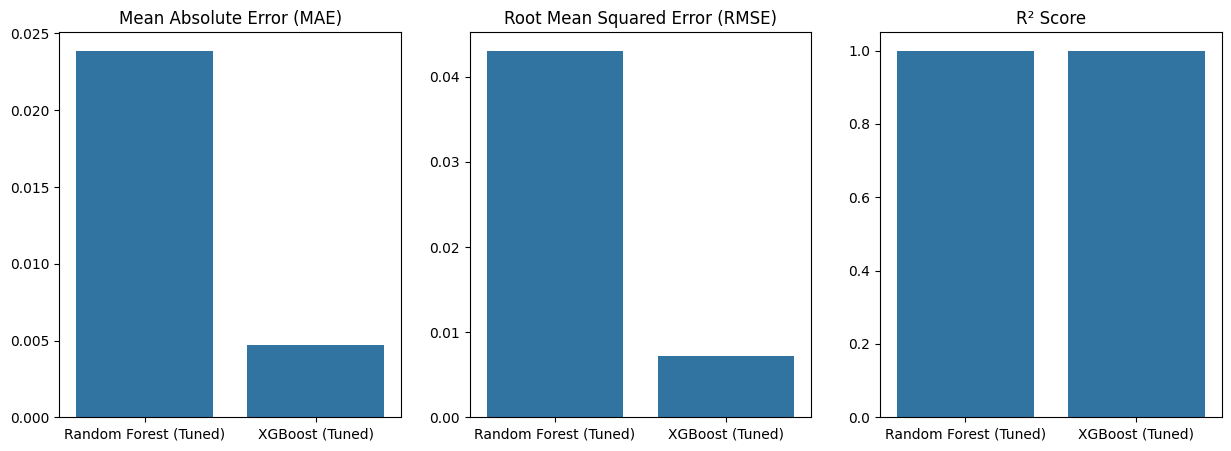

In [ ]:
models = ["Random Forest (Tuned)", "XGBoost (Tuned)"]
mae_values = [
    mean_absolute_error(y_test, y_pred_rf_best),
    mean_absolute_error(y_test, y_pred_xgb_best)
]

rmse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_rf_best)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))
]

r2_values = [
    r2_score(y_test, y_pred_rf_best),
    r2_score(y_test, y_pred_xgb_best)
]

# Plot Performance
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=models, y=mae_values, ax=ax[0])
ax[0].set_title("Mean Absolute Error (MAE)")

sns.barplot(x=models, y=rmse_values, ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)")

sns.barplot(x=models, y=r2_values, ax=ax[2])
ax[2].set_title("R² Score")

plt.show()


# Get back the best values


In [ ]:
!pip install --upgrade bayesian-optimization


In [ ]:
from scipy.optimize import minimize

In [ ]:
# Define input and output variables
X = df[['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp5_log']]  # Already normalized
y = df[['FF (%)', 'eta (%)']]

# Define objective function to maximize FF + η
def objective(bp1, bp2, bp3, bp4, bp5_log):
    inputs = np.array([[bp1, bp2, bp3, bp4, bp5_log]])
    predictions = xgb_best.predict(inputs)
    ff, eta = predictions[0]
    return ff + eta  # Maximizing FF + Efficiency

# Define parameter search space
pbounds = {
    'bp1': (X['bp 1'].min(), X['bp 1'].max()),
    'bp2': (X['bp 2'].min(), X['bp 2'].max()),
    'bp3': (X['bp 3'].min(), X['bp 3'].max()),
    'bp4': (X['bp 4'].min(), X['bp 4'].max()),
    'bp5_log': (X['bp5_log'].min(), X['bp5_log'].max())
}


# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=30)  # Initial 5 random points, then optimize over 30 iterations

# Get best parameters
best_params = optimizer.max['params']
print("\nOptimal Input Parameters:", best_params)

# Predict Voc and Jsc for the best parameters
best_input_scaled = np.array([list(best_params.values())])
best_predictions = xgb_best.predict(best_input_scaled)
best_ff, best_eta = best_predictions[0]

# Print the best results
print("\nMaximized Output Values:")
print(f"Fill Factor (FF): {best_ff:.4f}")
print(f"Efficiency (η): {best_eta:.4f}")

|   iter    |  target   |    bp1    |    bp2    |    bp3    |    bp4    |  bp5_log  |
-------------------------------------------------------------------------------------
| 1         | -0.6794   | -0.3673   | 1.275     | 0.7088    | 0.2647    | -0.923    |
| 2         | -4.223    | -1.007    | -1.25     | 1.119     | 0.2713    | 0.5583    |
| 3         | -2.913    | -1.404    | 1.329     | 1.016     | -0.7719   | -0.8538   |
| 4         | -1.85     | -0.9269   | -0.5537   | 0.07563   | -0.1826   | -0.5602   |
| 5         | -0.4116   | 0.3275    | -1.02     | -0.635    | -0.3586   | -0.1179   |
| 6         | -0.4116   | 0.4386    | -1.234    | -0.5351   | -0.3442   | -0.0513   |
| 7         | 0.1042    | 1.007     | 0.4164    | -0.1864   | 0.2883    | -0.9256   |
| 8         | 1.298     | 1.398     | -1.262    | -1.517    | 1.202     | -1.099    |
| 9         | 2.482     | 0.6056    | 1.067     | -1.513    | 1.339     | -1.045    |
| 10        | 2.48      | 1.187     | 1.167     | -1.2

In [ ]:
import pandas as pd
import numpy as np

print(best_params)

# Load data and clean column names
df = pd.read_excel("log_to_linear.xlsx")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print("Detected Columns:", df.columns.tolist())  # Debugging step

# Use exact column names from the dataset
means = df[['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp5_log','FF (%)', 'eta (%)']].mean()
stds = df[['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp5_log','FF (%)', 'eta (%)']].std()

# Convert back to original scale using correct column names
best_bp1 = (best_params['bp1'] * stds['bp 1']) + means['bp 1']
best_bp2 = (best_params['bp2'] * stds['bp 2']) + means['bp 2']
best_bp3 = (best_params['bp3'] * stds['bp 3']) + means['bp 3']
best_bp4 = (best_params['bp4'] * stds['bp 4']) + means['bp 4']
best_bp5 = 10 ** ((best_params['bp5_log'] * stds['bp5_log']) + means['bp5_log'])  # Convert log scale back
ff = (best_ff * stds['FF (%)']) + means['FF (%)']
eta = (best_eta * stds['eta (%)']) + means['eta (%)']


# Print the denormalized values
print("\nDenormalized Optimal Input Parameters:")
print(f"bp 1: {best_bp1:.4f}")
print(f"bp 2: {best_bp2:.4f}")
print(f"bp 3: {best_bp3:.4f}")
print(f"bp 4: {best_bp4:.4f}")
print(f"bp 5: {(best_bp5):.4f}")
print(f"FF (%): {ff:.4f}")
print(f"η (%): {eta:.4f}")


{'bp1': np.float64(1.380425461487595), 'bp2': np.float64(1.3608727206979663), 'bp3': np.float64(-1.39230556788092), 'bp4': np.float64(1.2696360986684694), 'bp5_log': np.float64(-0.755829476224745)}
Detected Columns: ['bp 1', 'bp 2', 'bp 3', 'bp 4', 'bp 5', 'eta (%)', 'Voc (V)', 'Jsc (mA/cm2)', 'FF (%)', 'bp5_log']

Denormalized Optimal Input Parameters:
bp 1: 5.8578
bp 2: 0.4925
bp 3: 296.5471
bp 4: 1.5920
bp 5: 451696684430.3871
FF (%): 86.7361
η (%): 26.7524


**ANN**

In [ ]:
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (assuming it's already in a DataFrame called df)
df = pd.read_excel('/content/Separated_dataset.xlsx')  # Uncomment if loading from CSV
df.columns = df.columns.str.replace(' ', '')
# Convert bp5 to log scale
df['bp5'] = np.log10(df['bp5'])

# Define input and output columns
input_cols = ['bp1', 'bp2', 'bp3', 'bp4', 'bp5']
output_cols = ['eta(%)', 'FF(%)']

# Normalize input and output parameters
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

df[input_cols] = scaler_input.fit_transform(df[input_cols])
df[output_cols] = scaler_output.fit_transform(df[output_cols])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Prepare data
X = df[input_cols].values
Y = df[output_cols].values  # Predicting only eta and FF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')
])

# Compile and train ANN
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_test, Y_test), verbose=0)

# Evaluate ANN on test data
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print(f"\n🔹 ANN R² Score: {r2:.4f}")

# Find Best Input Values for Maximum eta and FF
input_ranges = {
    'bp1': [1.00, 6.00],
    'bp2': [0.10, 0.50],
    'bp3': [295, 330],
    'bp4': [1.30, 1.60],
    'bp5': [11, 14]  # Updated log-scale range
}

# Generate random samples within constraints
samples = 5000
random_inputs = np.array([
    np.random.uniform(*input_ranges[key], samples) for key in input_cols
]).T

# Normalize the random inputs
random_inputs_scaled = scaler_input.transform(random_inputs)

# Predict using ANN
predictions = model.predict(random_inputs_scaled)

# Find the best input corresponding to the highest efficiency (eta)
best_index = np.argmax(predictions[:, 0])  # Maximize eta
best_inputs_scaled = random_inputs_scaled[best_index]
best_inputs = scaler_input.inverse_transform([best_inputs_scaled])

# Get predicted eta and FF values for the best inputs
best_outputs_scaled = predictions[best_index]
best_outputs = scaler_output.inverse_transform([best_outputs_scaled])

# Display results
print("\n🔹 Best Input Values for Maximum Efficiency and Fill Factor:")
for i, col in enumerate(input_cols):
    print(f"{col}: {best_inputs[0][i]:.5f}")

print("\n🔹 Predicted Output Values for Best Inputs:")
print(f"eta (%): {best_outputs[0][0]:.5f}")
print(f"FF (%): {best_outputs[0][1]:.5f}")


In [ ]:
bp5_final = 10**best_inputs[0][4]
print(bp5_final)